In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fuente: https://economics.stackexchange.com/questions/32039/good-source-for-marginal-propensity-to-consume-by-country
* household spending: https://data.oecd.org/hha/household-spending.htm#indicator-chart
* household disposable income: https://data.oecd.org/hha/household-disposable-income.htm#indicator-chart
* household debt: https://data.oecd.org/hha/household-debt.htm#indicator-chart
* working age population: https://data.oecd.org/pop/working-age-population.htm#indicator-chart
* income inequality: https://data.oecd.org/inequality/income-inequality.htm
* adult education level: https://data.oecd.org/eduatt/adult-education-level.htm

MPC can be calculated as the change in consumption (ΔC) divided by the change in income (ΔY).

$$
MPC = \frac{\Delta{C}}{\Delta{Y}} 
$$



In [2]:
import os
import glob

# use os.getcwd() to get current working directory
current_directory = os.getcwd()

# use glob.glob() to match file pattern
csv_files = glob.glob(os.path.join(current_directory, '*.csv'))
csv_files

['C:\\Users\\daniguvz\\OneDrive - Seguros Suramericana, S.A\\Documents\\GitHub\\macro\\GDP\\mpc\\adult_education.csv',
 'C:\\Users\\daniguvz\\OneDrive - Seguros Suramericana, S.A\\Documents\\GitHub\\macro\\GDP\\mpc\\household_debt.csv',
 'C:\\Users\\daniguvz\\OneDrive - Seguros Suramericana, S.A\\Documents\\GitHub\\macro\\GDP\\mpc\\household_income.csv',
 'C:\\Users\\daniguvz\\OneDrive - Seguros Suramericana, S.A\\Documents\\GitHub\\macro\\GDP\\mpc\\household_spending.csv',
 'C:\\Users\\daniguvz\\OneDrive - Seguros Suramericana, S.A\\Documents\\GitHub\\macro\\GDP\\mpc\\income_inequality.csv',
 'C:\\Users\\daniguvz\\OneDrive - Seguros Suramericana, S.A\\Documents\\GitHub\\macro\\GDP\\mpc\\working_pop.csv']

In [3]:
df_c = pd.read_csv('household_spending.csv')
df_c.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HHEXP,TOT,MLN_USD,A,1970,30476.510257,NaN
1,AUS,HHEXP,TOT,MLN_USD,A,1971,32799.844017,NaN
2,AUS,HHEXP,TOT,MLN_USD,A,1972,35590.183565,NaN
3,AUS,HHEXP,TOT,MLN_USD,A,1973,41114.456624,NaN
4,AUS,HHEXP,TOT,MLN_USD,A,1974,48461.851872,NaN


In [5]:
df_y = pd.read_csv('household_income.csv')
df_y.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,JPN,HHDI,GROSSADJ,USD_CAP,A,1994,16124.253761,NaN
1,JPN,HHDI,GROSSADJ,USD_CAP,A,1995,16737.559497,NaN
2,JPN,HHDI,GROSSADJ,USD_CAP,A,1996,17137.574301,NaN
3,JPN,HHDI,GROSSADJ,USD_CAP,A,1997,17604.818244,NaN
4,JPN,HHDI,GROSSADJ,USD_CAP,A,1998,17790.334459,NaN


In [6]:
df_d = pd.read_csv('household_debt.csv')
df_d.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HHDEBT,TOT,PC_NDI,A,1995,96.53382,NaN
1,AUS,HHDEBT,TOT,PC_NDI,A,1996,100.26810,NaN
2,AUS,HHDEBT,TOT,PC_NDI,A,1997,109.52950,NaN
3,AUS,HHDEBT,TOT,PC_NDI,A,1998,117.35200,NaN
4,AUS,HHDEBT,TOT,PC_NDI,A,1999,123.66920,NaN


In [7]:
df_pop = pd.read_csv('working_pop.csv')
df_pop.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WKGPOP,TOT,PC_POP,A,1950,65.282991,NaN
1,AUS,WKGPOP,TOT,PC_POP,A,1951,64.736336,NaN
2,AUS,WKGPOP,TOT,PC_POP,A,1952,64.263301,NaN
3,AUS,WKGPOP,TOT,PC_POP,A,1953,63.648429,NaN
4,AUS,WKGPOP,TOT,PC_POP,A,1954,63.086853,NaN


In [43]:
df_ine = pd.read_csv('income_inequality.csv')
df_ine.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,INCOMEINEQ,P50P10,RT,A,2012,2.2,NaN
1,AUS,INCOMEINEQ,P50P10,RT,A,2014,2.2,NaN
2,AUS,INCOMEINEQ,P50P10,RT,A,2016,2.1,NaN
3,AUS,INCOMEINEQ,P50P10,RT,A,2018,2.2,NaN
4,AUS,INCOMEINEQ,P50P10,RT,A,2020,2.2,NaN


In [9]:
df_edu = pd.read_csv('adult_education.csv')
df_edu.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EDUADULT,BUPPSRY,PC_25_64,A,1989,44.650639,NaN
1,AUS,EDUADULT,BUPPSRY,PC_25_64,A,1991,44.127056,NaN
2,AUS,EDUADULT,BUPPSRY,PC_25_64,A,1993,47.159046,NaN
3,AUS,EDUADULT,BUPPSRY,PC_25_64,A,1994,49.802025,NaN
4,AUS,EDUADULT,BUPPSRY,PC_25_64,A,1995,44.935852,NaN


# Wrangle

In [29]:
df_c['MEASURE'].unique()

array(['MLN_USD', 'PC_GDP', 'AGRWTH', 'PC_DI'], dtype=object)

In [48]:
# Exoenditure
df_c1 = df_c[df_c['MEASURE'] == 'AGRWTH'].copy()
#df_c1 = df_c1[df_c1['SUBJECT'] == 'TOT']
df_c1.rename(columns ={'Value':'c_change'}, inplace = True)
df_c1 = df_c1[['LOCATION', 'TIME', 'c_change']]
df_c1['c_change'] = df_c1['c_change'] / 100
df_c1['key'] = df_c1['LOCATION'] + df_c1['TIME'].astype(str)
df_c1.head()

,LOCATION,TIME,c_change,key
1905,JPN,1971,0.054801,JPN1971
1906,JPN,1972,0.089663,JPN1972
1907,JPN,1973,0.087943,JPN1973
1908,JPN,1974,-0.000866,JPN1974
1909,JPN,1975,0.043970,JPN1975


In [49]:
# income
df_y1 = df_y[df_y['SUBJECT'] =='GROSS'].copy()
df_y1.rename(columns = {'Value':'y_change'}, inplace = True)
df_y1 = df_y1[['LOCATION', 'TIME', 'y_change']]
df_y1['y_change'] = df_y1['y_change']/100
df_y1['key'] = df_y1['LOCATION'] + df_y1['TIME'].astype(str)
df_y1.head()

,LOCATION,TIME,y_change,key
1113,AUS,2008,0.0336,AUS2008
1114,AUS,2009,0.0210,AUS2009
1115,AUS,2010,0.0196,AUS2010
1116,AUS,2011,0.0362,AUS2011
1117,AUS,2012,-0.0096,AUS2012


In [50]:
# inequality
df_ine1 = df_ine[df_ine['SUBJECT'] =='GINI'].copy()
df_ine1.rename(columns = {'Value':'gini'}, inplace = True)
df_ine1 = df_ine1[['LOCATION', 'TIME', 'gini']]
df_ine1['key'] = df_ine1['LOCATION'] + df_ine1['TIME'].astype(str)
df_ine1.head()

,LOCATION,TIME,gini,key
15,AUS,2012,0.326,AUS2012
16,AUS,2014,0.337,AUS2014
17,AUS,2016,0.330,AUS2016
18,AUS,2018,0.325,AUS2018
19,AUS,2020,0.318,AUS2020


In [81]:
# population
df_pop1 = df_pop.copy()
df_pop1.rename(columns = {'Value':'wk_pop'}, inplace = True)
df_pop1 = df_pop1[['LOCATION', 'TIME', 'wk_pop']]
df_pop1['wk_pop'] = df_pop1['wk_pop'] / 100
df_pop1['key'] = df_pop1['LOCATION'] + df_pop1['TIME'].astype(str)
df_pop1.head()

,LOCATION,TIME,wk_pop,key
0,AUS,1950,0.652830,AUS1950
1,AUS,1951,0.647363,AUS1951
2,AUS,1952,0.642633,AUS1952
3,AUS,1953,0.636484,AUS1953
4,AUS,1954,0.630869,AUS1954


In [96]:
# edu
df_edu1 = df_edu[df_edu['SUBJECT'].isin(['BUPPSRY', 'TRY', 'UPPSRY'])].copy()
df_edu1w = df_edu1.pivot(index=['LOCATION', 'TIME'], columns='SUBJECT', values='Value').reset_index()
df_edu1w['key'] = df_edu1w['LOCATION'] + df_edu1w['TIME'].astype(str)
df_edu1w['BUPPSRY'] = df_edu1w['BUPPSRY'] / 100
df_edu1w['UPPSRY'] = df_edu1w['UPPSRY'] / 100
df_edu1w['TRY'] = df_edu1w['TRY'] / 100
df_edu1w

SUBJECT,LOCATION,TIME,BUPPSRY,TRY,UPPSRY,key
0,ARG,2004,0.512055,0.167119,0.320827,ARG2004
1,ARG,2005,0.501580,0.174711,0.323710,ARG2005
2,ARG,2006,0.484728,0.178310,0.336962,ARG2006
3,ARG,2008,0.458048,0.189738,0.352214,ARG2008
4,ARG,2009,0.447943,0.195186,0.356871,ARG2009
...,...,...,...,...,...,...
1077,ZAF,2016,0.582112,0.138046,0.279842,ZAF2016
1078,ZAF,2017,0.559351,0.154957,0.285693,ZAF2017
1079,ZAF,2018,0.552972,0.153880,0.293148,ZAF2018
1080,ZAF,2019,0.544620,0.157982,0.297398,ZAF2019


In [121]:
# debt
df_d1 = df_d.copy()
df_d1.rename(columns = {'Value':'debt'}, inplace = True)
df_d1 = df_d1[['LOCATION', 'TIME', 'debt']]
df_d1['debt'] = df_d1['debt'] / 100
df_d1['key'] = df_d1['LOCATION'] + df_d1['TIME'].astype(str)
df_d1.head()

,LOCATION,TIME,debt,key
0,AUS,1995,0.965338,AUS1995
1,AUS,1996,1.002681,AUS1996
2,AUS,1997,1.095295,AUS1997
3,AUS,1998,1.173520,AUS1998
4,AUS,1999,1.236692,AUS1999


# Merge

In [123]:
df_m1 = df_c1.merge(df_y1.drop(columns = ['LOCATION', 'TIME']), how='inner', on ='key')
df_m2 = df_m1.merge(df_ine1.drop(columns = ['LOCATION', 'TIME']), how='inner', on ='key')
df_m3 = df_m2.merge(df_pop1.drop(columns = ['LOCATION', 'TIME']), how='inner', on ='key')
df_m4 = df_m3.merge(df_edu1w.drop(columns = ['LOCATION', 'TIME']), how='inner', on ='key')
df_m5 = df_m4.merge(df_d1.drop(columns = ['LOCATION', 'TIME']), how='inner', on ='key')

print(len(df_c1), 'filas tabla consumo')
print(len(df_y1), 'filas tabla ingreso')
print(len(df_ine1), 'filas tabla gini')
print(len(df_ine1), 'filas tabla working age pop')
print(len(df_edu1w), 'filas tabla education')
print(len(df_d1), 'filas tabla debt')
print(len(df_m1), 'filas tabla consumo + ingreso')
print(len(df_m2), 'filas tabla consumo + ingreso + gini')
print(len(df_m3), 'filas tabla consumo + ingreso + gini + pop')
print(len(df_m4), 'filas tabla consumo + ingreso + gini + pop + edu')
print(len(df_m5), 'filas tabla consumo + ingreso + gini + pop + edu + debt')
df_m5.head()

1974 filas tabla consumo
2048 filas tabla ingreso
553 filas tabla gini
553 filas tabla working age pop
1082 filas tabla education
875 filas tabla debt
360 filas tabla consumo + ingreso
256 filas tabla consumo + ingreso + gini
256 filas tabla consumo + ingreso + gini + pop
256 filas tabla consumo + ingreso + gini + pop + edu
256 filas tabla consumo + ingreso + gini + pop + edu + debt


,LOCATION,TIME,c_change,key,y_change,gini,wk_pop,BUPPSRY,TRY,UPPSRY,debt
0,JPN,2018,0.002308,JPN2018,0.0066,0.334,0.596717,NaN,0.519281,NaN,1.166238
1,SVN,2008,0.028694,SVN2008,0.0241,0.234,0.697288,0.179568,0.226377,0.594055,0.541354
2,SVN,2009,0.020734,SVN2009,-0.0164,0.245,0.695266,0.167135,0.233158,0.599707,0.567935
3,SVN,2010,0.009741,SVN2010,-0.0071,0.245,0.693427,0.166899,0.237166,0.595934,0.596502
4,SVN,2011,0.007933,SVN2011,0.0004,0.243,0.691429,0.155237,0.250906,0.593857,0.584063


<Axes: xlabel='y_change', ylabel='c_change'>

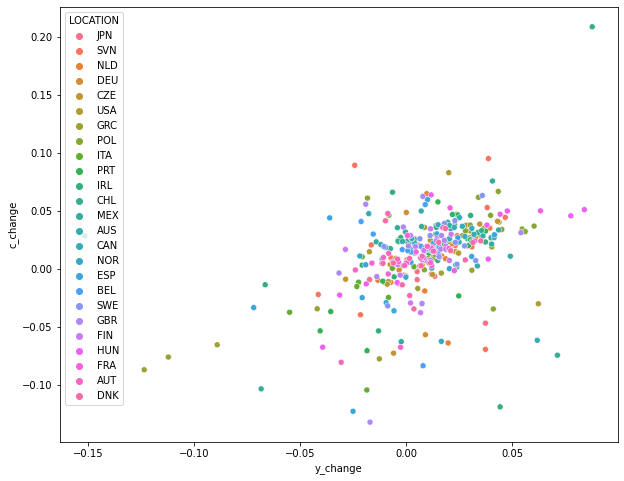

In [124]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df_m1, x = 'y_change', y='c_change', hue = 'LOCATION')

<Axes: xlabel='y_change', ylabel='c_change'>

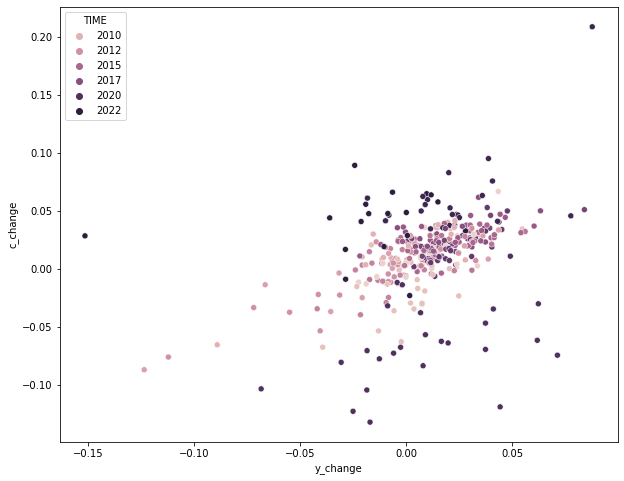

In [125]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df_m1, x = 'y_change', y='c_change', hue = 'TIME')

In [129]:
df_m5.columns

Index(['LOCATION', 'TIME', 'c_change', 'key', 'y_change', 'gini', 'wk_pop',
       'BUPPSRY', 'TRY', 'UPPSRY', 'debt'],
      dtype='object')

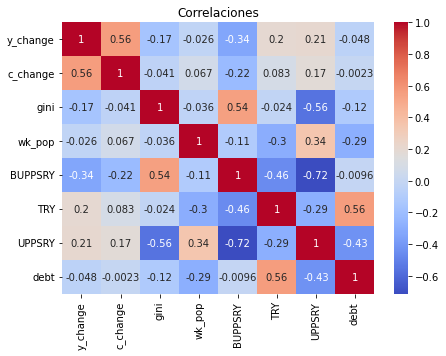

In [128]:
df_corr = df_m5[['y_change', 'c_change', 'gini', 'wk_pop','BUPPSRY','TRY', 'UPPSRY' ,'debt']].corr()
plt.figure(figsize = (7,5))
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm')
plt.title('Correlaciones')
plt.show()

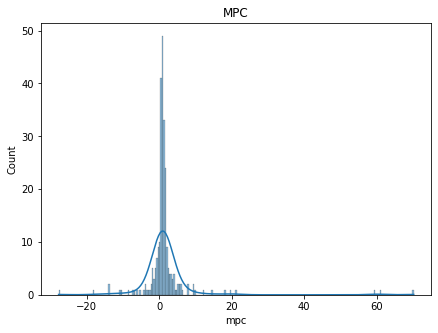

In [132]:
df_m5['mpc'] = df_m5['c_change'] / df_m5['y_change']
plt.figure(figsize = (7,5))
sns.histplot(df_m2['mpc'], kde = True)
plt.title('MPC')
plt.show()

In [133]:
countries = df_m2['LOCATION'].unique()
dict_mpc = {}
for country in countries:
    df_temp = df_m5[df_m5['LOCATION'] == country].copy()
    dict_mpc[country] = df_temp['mpc'].mean()
dict_mpc

{'JPN': 0.3496708086197667,
 'SVN': 1.9075334599006044,
 'NLD': 0.9808508198327887,
 'DEU': -0.7643881179148446,
 'CZE': 1.6949823772648793,
 'USA': 1.1000065743861553,
 'GRC': 5.091646778036808,
 'POL': 1.4210428347796376,
 'ITA': 1.1902069669160886,
 'PRT': 4.945390033088527,
 'IRL': -0.29817152676146913,
 'CHL': -7.481357290276045,
 'MEX': 5.349925380401959,
 'AUS': -2.6010862257561707,
 'CAN': 2.4003816807147547,
 'NOR': 0.8784980567365258,
 'ESP': 7.690068144322222,
 'BEL': -2.2834642284316735,
 'SWE': 2.1834704078181044,
 'GBR': 0.47959100215484196,
 'FIN': 0.426266425604308,
 'HUN': 1.1115311840136017,
 'FRA': 1.1401216190257424,
 'AUT': 0.01020455698273496,
 'DNK': 1.2441908811890394}

In [134]:
import statsmodels.api as sm
X = df_m5[['y_change', 'gini','TRY', 'UPPSRY', 'debt']]
y = df_m5['c_change']
X = sm.add_constant(X)
model = sm.OLS(y, X, missing = 'drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               c_change   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     25.45
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.03e-20
Time:                        10:36:06   Log-Likelihood:                 561.60
No. Observations:                 255   AIC:                            -1111.
Df Residuals:                     249   BIC:                            -1090.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0765      0.026     -2.941      0.004      -0.128      -0.025
y_change       0.7061      0.070     10.135      0.000       0.569       0.843
gini           0.1519      0.053      2.848      0.005       0.047       0.257
TRY           -0.0177      0.021     -0.859      0.391      -0.058       0.023
UPPSRY         0.0578      0.020      2.949      0.003       0.019       0.096
debt           0.0092      0.004      2.445      0.015       0.002       0.017
==============================================================================
Omnibus:                      126.937   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.637
Skew:                          -2.073   Prob(JB):                    2.02e-124
Kurtosis:                       9.036   Cond. No.                         76.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Debt

In [141]:
df_c2 = df_c[df_c['MEASURE'] == 'MLN_USD'].copy()
df_c2.rename(columns ={'Value':'c'}, inplace = True)
df_c2 = df_c2[['LOCATION', 'TIME', 'c']]
df_c2['key'] = df_c2['LOCATION'] + df_c2['TIME'].astype(str)
df_c2.head()

,LOCATION,TIME,c,key
0,AUS,1970,30476.510257,AUS1970
1,AUS,1971,32799.844017,AUS1971
2,AUS,1972,35590.183565,AUS1972
3,AUS,1973,41114.456624,AUS1973
4,AUS,1974,48461.851872,AUS1974


In [143]:
df_y2 = df_y[df_y['MEASURE'] == 'USD_CAP'].copy()
df_y2.rename(columns = {'Value':'y'}, inplace = True)
df_y2 = df_y2[['LOCATION', 'TIME', 'y']]
df_y2['key'] = df_y2['LOCATION'] + df_y2['TIME'].astype(str)
df_y2.head()

,LOCATION,TIME,y,key
0,JPN,1994,16124.253761,JPN1994
1,JPN,1995,16737.559497,JPN1995
2,JPN,1996,17137.574301,JPN1996
3,JPN,1997,17604.818244,JPN1997
4,JPN,1998,17790.334459,JPN1998


In [144]:
df_dm1 = df_c2.merge(df_y2.drop(columns = ['LOCATION', 'TIME']), how='inner', on ='key')
df_dm2 = df_dm1.merge(df_ine1.drop(columns = ['LOCATION', 'TIME']), how='inner', on ='key')
df_dm3 = df_dm2.merge(df_pop1.drop(columns = ['LOCATION', 'TIME']), how='inner', on ='key')
df_dm4 = df_dm3.merge(df_edu1w.drop(columns = ['LOCATION', 'TIME']), how='inner', on ='key')
df_dm5 = df_dm4.merge(df_d1.drop(columns = ['LOCATION', 'TIME']), how='inner', on ='key')

print(len(df_c2), 'filas tabla consumo')
print(len(df_y2), 'filas tabla ingreso')
print(len(df_ine1), 'filas tabla gini')
print(len(df_ine1), 'filas tabla working age pop')
print(len(df_edu1w), 'filas tabla education')
print(len(df_d1), 'filas tabla debt')
print(len(df_dm1), 'filas tabla consumo + ingreso')
print(len(df_dm2), 'filas tabla consumo + ingreso + gini')
print(len(df_dm3), 'filas tabla consumo + ingreso + gini + pop')
print(len(df_dm4), 'filas tabla consumo + ingreso + gini + pop + edu')
print(len(df_dm5), 'filas tabla consumo + ingreso + gini + pop + edu + debt')
df_dm5.head()

1991 filas tabla consumo
1113 filas tabla ingreso
553 filas tabla gini
553 filas tabla working age pop
1082 filas tabla education
875 filas tabla debt
1113 filas tabla consumo + ingreso
454 filas tabla consumo + ingreso + gini
454 filas tabla consumo + ingreso + gini + pop
437 filas tabla consumo + ingreso + gini + pop + edu
418 filas tabla consumo + ingreso + gini + pop + edu + debt


,LOCATION,TIME,c,key,y,gini,wk_pop,BUPPSRY,TRY,UPPSRY,debt
0,AUS,2012,543065.524427,AUS2012,33934.614031,0.326,0.669305,0.235634,0.412824,0.351542,1.922672
1,AUS,2014,595208.682962,AUS2014,36816.129278,0.337,0.664254,0.228958,0.419019,0.352023,1.963439
2,AUS,2016,637321.742774,AUS2016,38951.606333,0.330,0.659176,0.200674,0.437439,0.361887,2.115531
3,AUS,2018,673616.626363,AUS2018,39522.008971,0.325,0.655532,0.181086,0.457275,0.361639,2.179175
4,AUS,2020,669373.015872,AUS2020,42423.425135,0.318,0.650800,0.162450,0.493375,0.344176,2.043846


In [146]:
df_dm5['c_y'] = df_dm5['c'] / df_dm5['y']
df_dm5

,LOCATION,TIME,c,key,y,gini,wk_pop,BUPPSRY,TRY,UPPSRY,debt,c_y
0,AUS,2012,543065.524427,AUS2012,33934.614031,0.326,0.669305,0.235634,0.412824,0.351542,1.922672,16.003292
1,AUS,2014,595208.682962,AUS2014,36816.129278,0.337,0.664254,0.228958,0.419019,0.352023,1.963439,16.167063
2,AUS,2016,637321.742774,AUS2016,38951.606333,0.330,0.659176,0.200674,0.437439,0.361887,2.115531,16.361886
3,AUS,2018,673616.626363,AUS2018,39522.008971,0.325,0.655532,0.181086,0.457275,0.361639,2.179175,17.044089
4,AUS,2020,669373.015872,AUS2020,42423.425135,0.318,0.650800,0.162450,0.493375,0.344176,2.043846,15.778382
...,...,...,...,...,...,...,...,...,...,...,...,...
413,LTU,2016,49994.303127,LTU2016,23290.250939,0.378,0.661012,0.074844,0.397326,0.527830,0.447138,2.146576
414,LTU,2017,53074.638259,LTU2017,24464.784028,0.374,0.656069,0.071720,0.402739,0.525541,0.458968,2.169430
415,LTU,2018,56366.987522,LTU2018,25808.381804,0.361,0.652430,0.070225,0.416546,0.513229,0.429935,2.184057
416,LTU,2019,59898.677626,LTU2019,28781.826428,0.357,0.650527,0.067358,0.431494,0.501148,0.422062,2.081128


In [151]:
log_cols = ['c',  'y','c_y']
for col in log_cols:
    df_dm5['log_'+col] = np.log(df_dm5[col])

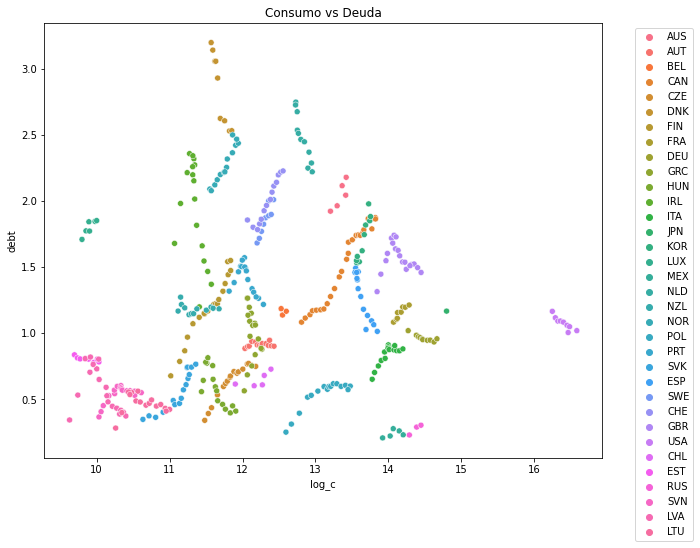

In [155]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df_dm5, x = 'log_c', y='debt', hue = 'LOCATION')
plt.title('Consumo vs Deuda')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

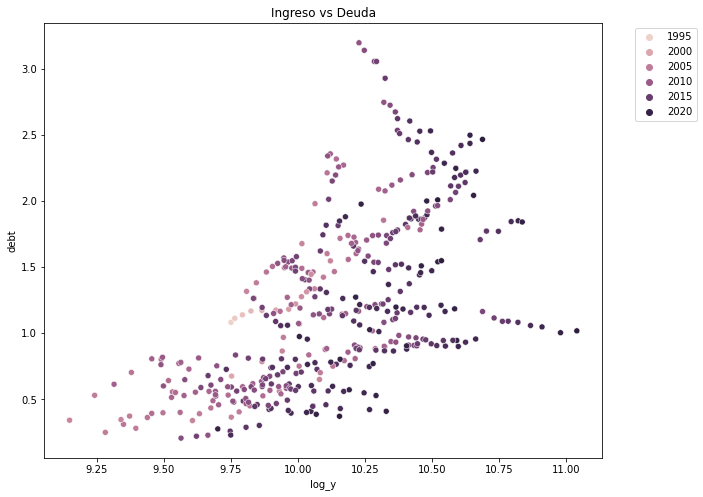

In [162]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df_dm5, x = 'log_y', y='debt', hue = 'TIME')
plt.title('Ingreso vs Deuda')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

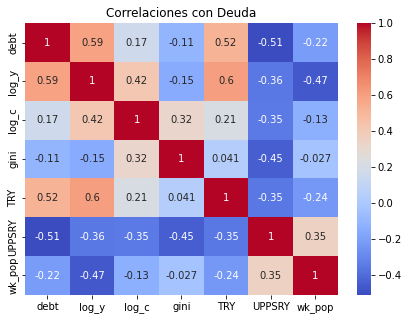

In [163]:
df_corr2 = df_dm5[['debt','log_y', 'log_c','gini','TRY', 'UPPSRY', 'wk_pop']].corr()
plt.figure(figsize = (7,5))
sns.heatmap(df_corr2, annot = True, cmap ='coolwarm')
plt.title('Correlaciones con Deuda')
plt.show()

In [159]:
X = df_dm5[['log_y', 'log_c','gini','TRY', 'UPPSRY', 'wk_pop']]
y = df_dm5['debt']
X = sm.add_constant(X)
model = sm.OLS(y, X, missing = 'drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   debt   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     83.70
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           9.73e-68
Time:                        10:48:29   Log-Likelihood:                -233.84
No. Observations:                 410   AIC:                             481.7
Df Residuals:                     403   BIC:                             509.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7804      1.467     -4.620      0.000      -9.665      -3.896
log_y          0.7388      0.107      6.937      0.000       0.529       0.948
log_c         -0.0490      0.019     -2.597      0.010      -0.086      -0.012
gini          -3.4372      0.616     -5.576      0.000      -4.649      -2.225
TRY            1.0770      0.260      4.135      0.000       0.565       1.589
UPPSRY        -2.3820      0.203    -11.732      0.000      -2.781      -1.983
wk_pop         4.3501      1.053      4.133      0.000       2.281       6.419
==============================================================================
Omnibus:                       47.220   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.556
Skew:                           0.744   Prob(JB):                     1.07e-16
Kurtosis:                       4.446   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

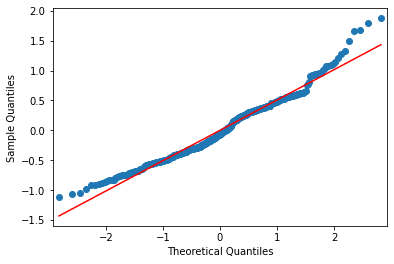

In [165]:
from statsmodels.graphics.gofplots import qqplot
# Get residuals
residuals = results.resid

# Generate Q-Q plot for the residuals
qqplot(residuals, line='s')
plt.show()